In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options

options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  # Ruta a Firefox

service = Service(r'C:\Users\herna\OneDrive\Escritorio\geckodriver\geckodriver-v0.35.0-win32\geckodriver.exe')
driver = webdriver.Firefox(service=service, options=options)

driver.get('https://www.tripadvisor.com.ar/Attraction_Review-g312806-d553293-Reviews-Puerto_Iguazu-Puerto_Iguazu_Province_of_Misiones_Litoral.html')
page_content = driver.page_source
driver.quit()

print(page_content)


<html lang="es-AR"><head><link rel="icon" id="favicon" href="https://static.tacdn.com/favicon.ico?v2" type="image/x-icon"><link rel="mask-icon" sizes="any" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" color="#000000"><meta name="theme-color" content="#34e0a1"><meta name="format-detection" content="telephone=no"><meta property="al:ios:app_name" content="TripAdvisor"><meta property="al:ios:app_store_id" content="284876795"><meta property="twitter:app:id:ipad" name="twitter:app:id:ipad" content="284876795"><meta property="twitter:app:id:iphone" name="twitter:app:id:iphone" content="284876795"><meta property="al:ios:url" content="tripadvisor://www.tripadvisor.com.ar/Attraction_Review-g312806-d553293-Reviews-Puerto_Iguazu-Puerto_Iguazu_Province_of_Misiones_Litoral.html?m=33762"><meta property="twitter:app:url:ipad" name="twitter:app:url:ipad" content="tripadvisor://www.tripadvisor.com.ar/Attraction_Review-g312806-d553293-Reviews-Puerto_Iguazu-Puerto_Igu

In [2]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup


In [3]:
options = Options()
options.binary_location = r"C:\Program Files\Mozilla Firefox\firefox.exe"  # Ruta al ejecutable de Firefox

driver = webdriver.Firefox(options=options)
driver.get('https://www.tripadvisor.com.ar/Attraction_Review-g312806-d553293-Reviews-Puerto_Iguazu-Puerto_Iguazu_Province_of_Misiones_Litoral.html')

time.sleep(5)  # Espera para asegurarte de que la página se cargue completamente


In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  # Cambia esta ruta según la ubicación de tu Firefox

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Smirnoff-Vodka-25-4-80-Proof/dp/B008XR99VS#customerReviews"
driver.get(url)

# Esperar a que las reseñas se carguen
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'review-text-content')))

# Lista para almacenar las reseñas
reviews = []

# Extraer las reseñas en la página actual
review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

for element in review_elements:
    reviews.append(element.text)

# Cerrar el navegador
driver.quit()

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('amazon_reviews_current_page.csv', index=False)

print("Reseñas extraídas y guardadas en 'amazon_reviews_current_page.csv'")


Reseñas extraídas y guardadas en 'amazon_reviews_current_page.csv'


In [2]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'amazon_reviews_current_page.csv'  # Asegúrate de que el archivo esté en el mismo directorio que tu script o proporciona la ruta completa
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(df.head())


                                              Review
0  Always have some on hand to add to recipes, co...
1  I call this my yoga water. Mix it with a littl...
2  It's good. This is how vodka has always tasted...
3  Butt at least I kissed her! Obviously I’m writ...
4                                         Good vodka


In [3]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  # Cambia esta ruta según la ubicación de tu Firefox

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Smirnoff-Vodka-25-4-80-Proof/dp/B008XR99VS#customerReviews"
driver.get(url)


⭕ Se verifica el nombre visible del boton, en este caso el diseño del boton decia (see more reviews), luego con el boton derecho hacemos clic en el boton y elegimos inspeccionar, y luego compiar>>copiar elemento. 

In [4]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  # Cambia esta ruta según la ubicación de tu Firefox

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Smirnoff-Vodka-25-4-80-Proof/dp/B008XR99VS"
driver.get(url)

# Esperar a que el botón "See more reviews" esté disponible y hacer clic
wait = WebDriverWait(driver, 10)
see_more_reviews_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")))
see_more_reviews_button.click()

# Lista para almacenar las reseñas
reviews = []

# Bucle para extraer reseñas de varias páginas
while True:
    # Esperar a que las reseñas se carguen
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'review-text-content')))

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    # Intentar encontrar y hacer clic en el botón de "Siguiente página"
    try:
        next_button = driver.find_element(By.CLASS_NAME, 'a-last')
        # Verificar si el botón "Siguiente" está habilitado
        if "a-disabled" in next_button.get_attribute("class"):
            print("No hay más páginas disponibles.")
            break
        next_button.click()
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue
    except Exception as e:
        print("No se pudo encontrar el botón 'Siguiente página' o hubo un problema:", e)
        break  # Salir del bucle si no se encuentra el botón "Siguiente página"

# Cerrar el navegador
driver.quit()

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('amazon_reviews_all_pages.csv', index=False)

print("Reseñas extraídas y guardadas en 'amazon_reviews_all_pages.csv'")


No hay más páginas disponibles.
Reseñas extraídas y guardadas en 'amazon_reviews_all_pages.csv'


In [14]:
import pandas as pd

# Asegúrate de que el nombre del archivo es correcto, incluyendo la extensión .csv
file_path = 'amazon_reviews_all_pages.csv'  # Cambia la ruta si el archivo está en otra ubicación

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Obtener la cantidad de filas y columnas
num_filas, num_columnas = df.shape

# Mostrar los resultados
print(f"Cantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")



Cantidad de filas: 16
Cantidad de columnas: 1


Paso 1: Preparación del Entorno
Asegúrate de tener instaladas las siguientes bibliotecas de Python:

pip install pandas nltk textblob


Paso 2: Cargar los Datos
Primero, cargaremos las reseñas en un DataFrame de pandas:

In [15]:
import pandas as pd

# Crear un DataFrame con las reseñas
data = {
    'Review': [
        "Always have some on hand to add to recipes, cocktails or to use in various crafts like cake decorating (It dries quickly with no smell).",
        "I call this my yoga water. Mix it with a little 0 cal tangerine lime soda water and you might wanna be careful because you could end up being an alcoholic it’s so delicious. Drink responsibly people, don’t spill, That’s called a party foul. I could be a spokesperson for Smirnoff I love it that much.",
        "It's good. This is how vodka has always tasted. But there's not much of a distinction from other brands I've tried but still getting me a good buzz. No complaints. I recommend. Would buy again. In fact, placing another order right now along with some other ones. Raymond out.",
        "Butt at least I kissed her! Obviously I’m writing this after I drank the whole bottle. So uh..,.,,!’",
        "Good vodka",
        "Who doesn’t love vodka?!?!",
        "I purchase bcs it is cheap",
        "IMHO, of course, after sampling dozens of brands, Smirnoff is the cleanest and smoothest, and mixes well with just about anything (other than whiskey), especially fruit juices, hard lemonade, spritzers and all the usual classic drinks like Pina Colada's and Electric Iced Tea, among your favorites as well. Absolutely recommended.",
        "Vodka!!!",
        "Just love these Amazon pickers and drivers..well worth the extra...please tip your delivery in cash if you can",
        "I love to drink after work it takes all the pain away and helps me sleep... RedWhite81 Shane 👽",
        "Viene bien protegido la botella en un empaque lleno de aire. No viene en caja lo q se me hace raro tal vez por la protección q le dan a la botella con el paquete.",
        "El producto llego antes de lo esperado, asi es que estoy muy contento con el servicio. Gracias!",
        "Muy bien empaquetado",
        "Calidad/Precio",
        "Tengo años que este es mi vodka favorito, me agrada que siempre conserva su agradable sabor"
    ]
}

df = pd.DataFrame(data)


Paso 3: Análisis de Sentimientos
Usaremos TextBlob para realizar un análisis de sentimientos. Esto nos permitirá determinar si una reseña es positiva, negativa o neutra.

In [16]:
from textblob import TextBlob

# Función para obtener el sentimiento de una reseña
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimiento a cada reseña
df['Sentimiento'] = df['Review'].apply(obtener_sentimiento)

# Mostrar el DataFrame con los sentimientos
print(df[['Review', 'Sentimiento']])


                                               Review Sentimiento
0   Always have some on hand to add to recipes, co...    Positivo
1   I call this my yoga water. Mix it with a littl...    Positivo
2   It's good. This is how vodka has always tasted...    Positivo
3   Butt at least I kissed her! Obviously I’m writ...    Negativo
4                                          Good vodka    Positivo
5                          Who doesn’t love vodka?!?!    Positivo
6                          I purchase bcs it is cheap    Positivo
7   IMHO, of course, after sampling dozens of bran...    Negativo
8                                            Vodka!!!      Neutro
9   Just love these Amazon pickers and drivers..we...    Positivo
10  I love to drink after work it takes all the pa...    Positivo
11  Viene bien protegido la botella en un empaque ...      Neutro
12  El producto llego antes de lo esperado, asi es...      Neutro
13                               Muy bien empaquetado      Neutro
14        

Paso 4: Análisis de Palabras Clave
Podemos utilizar la biblioteca nltk para analizar las palabras más frecuentes en las reseñas.

In [17]:
import nltk
from collections import Counter
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

# Combinar todas las reseñas en un solo texto
all_reviews = ' '.join(df['Review'])

# Convertir a minúsculas y eliminar signos de puntuación
all_reviews = all_reviews.lower()
all_reviews = re.sub(r'\W+', ' ', all_reviews)

# Dividir en palabras
words = all_reviews.split()

# Eliminar palabras comunes (stopwords)
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))
filtered_words = [word for word in words if word not in stop_words]

# Contar las palabras más comunes
word_counts = Counter(filtered_words)
print(word_counts.most_common(10))  # Mostrar las 10 palabras más comunes


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('vodka', 5), ('love', 4), ('good', 3), ('well', 3), ('always', 2), ('like', 2), ('water', 2), ('could', 2), ('drink', 2), ('smirnoff', 2)]


In [18]:
# Contar la cantidad de reseñas por tipo de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()
print(sentimiento_counts)


Sentimiento
Positivo    8
Neutro      6
Negativo    2
Name: count, dtype: int64


opiniones repetidas

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Vectorizar las reseñas para comparar similitudes
tfidf = TfidfVectorizer().fit_transform(df['Review'])
similarities = cosine_similarity(tfidf, tfidf)

# Configurar un umbral para considerar reseñas como "repetidas"
umbral_similitud = 0.8

# Buscar pares de reseñas similares
pairs = np.argwhere((similarities > umbral_similitud) & (similarities < 1.0))

print("Pares de reseñas similares:")
for i, j in pairs:
    print(f"\nReseña {i + 1}: {df['Review'].iloc[i]}")
    print(f"Reseña {j + 1}: {df['Review'].iloc[j]}")


Pares de reseñas similares:

Reseña 8: IMHO, of course, after sampling dozens of brands, Smirnoff is the cleanest and smoothest, and mixes well with just about anything (other than whiskey), especially fruit juices, hard lemonade, spritzers and all the usual classic drinks like Pina Colada's and Electric Iced Tea, among your favorites as well. Absolutely recommended.
Reseña 8: IMHO, of course, after sampling dozens of brands, Smirnoff is the cleanest and smoothest, and mixes well with just about anything (other than whiskey), especially fruit juices, hard lemonade, spritzers and all the usual classic drinks like Pina Colada's and Electric Iced Tea, among your favorites as well. Absolutely recommended.


Analisis de opiniones

Distribución de Sentimientos:
Sentimiento
Positivo    8
Neutro      6
Negativo    2
Name: count, dtype: int64

Porcentaje de Sentimientos:
Sentimiento
Positivo    50.0
Neutro      37.5
Negativo    12.5
Name: proportion, dtype: float64


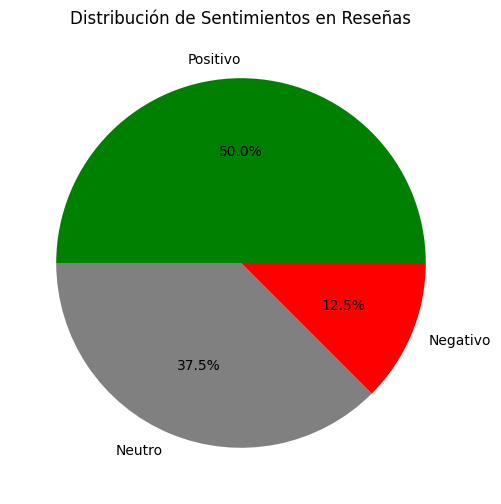

In [20]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Suponiendo que ya tienes las reseñas cargadas en un DataFrame llamado df
# Si no, puedes cargarlo desde un archivo CSV
# df = pd.read_csv('amazon_reviews_all_pages.csv')

# Función para obtener el sentimiento de una reseña
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimiento a cada reseña
df['Sentimiento'] = df['Review'].apply(obtener_sentimiento)

# Contar la cantidad de reseñas por tipo de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()

# Mostrar la distribución de sentimientos
print("Distribución de Sentimientos:")
print(sentimiento_counts)

# Calcular el porcentaje de cada sentimiento
sentimiento_percentages = df['Sentimiento'].value_counts(normalize=True) * 100

# Mostrar los porcentajes de sentimientos
print("\nPorcentaje de Sentimientos:")
print(sentimiento_percentages)

# Visualizar la distribución de sentimientos en un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sentimiento_percentages, labels=sentimiento_percentages.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Distribución de Sentimientos en Reseñas')
plt.show()


## web scraping Yukon Jack

In [21]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  # Cambia esta ruta según la ubicación de tu Firefox

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Yukon-Jack-Licor-25-4-Proof/dp/B002U38SBS"
driver.get(url)

# Esperar a que el botón "See more reviews" esté disponible y hacer clic
wait = WebDriverWait(driver, 10)
try:
    see_more_reviews_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")))
    see_more_reviews_button.click()
except:
    print("No se encontró el botón 'See more reviews'. Continuando con la página actual...")

# Lista para almacenar las reseñas
reviews = []

# Bucle para extraer reseñas de varias páginas
while True:
    # Esperar a que las reseñas se carguen
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'review-text-content')))

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    # Intentar encontrar y hacer clic en el botón de "Siguiente página"
    try:
        next_button = driver.find_element(By.CLASS_NAME, 'a-last')
        # Verificar si el botón "Siguiente" está habilitado
        if "a-disabled" in next_button.get_attribute("class"):
            print("No hay más páginas disponibles.")
            break
        next_button.click()
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue
    except Exception as e:
        print("No se pudo encontrar el botón 'Siguiente página' o hubo un problema:", e)
        break  # Salir del bucle si no se encuentra el botón "Siguiente página"

# Cerrar el navegador
driver.quit()

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('yukon_jack_reviews.csv', index=False)

print("Reseñas extraídas y guardadas en 'yukon_jack_reviews.csv'")



No se pudo encontrar el botón 'Siguiente página' o hubo un problema: Message: Unable to locate element: .a-last; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:511:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Reseñas extraídas y guardadas en 'yukon_jack_reviews.csv'


## carga del archivo para analisis

In [22]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'yukon_jack_reviews.csv'  # Asegúrate de que el archivo esté en el mismo directorio que tu script
df = pd.read_csv(file_path)

# Mostrar las primeras &#8203;:contentReference[oaicite:0]{index=0}&#8203;


In [23]:

# Obtener la cantidad de filas y columnas
num_filas, num_columnas = df.shape

# Mostrar los resultados
print(f"Cantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")


Cantidad de filas: 1
Cantidad de columnas: 1


## Analisis de sentimientos

In [24]:
from textblob import TextBlob

# Función para obtener el sentimiento de una reseña
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimiento a cada reseña
df['Sentimiento'] = df['Review'].apply(obtener_sentimiento)

# Contar la cantidad de reseñas por tipo de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()

# Mostrar la distribución de sentimientos
print("Distribución de Sentimientos:")
print(sentimiento_counts)


Distribución de Sentimientos:
Sentimiento
Positivo    1
Name: count, dtype: int64


## Analisis de palabras claves

In [25]:
import nltk
from collections import Counter
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

# Combinar todas las reseñas en un solo texto
all_reviews = ' '.join(df['Review'])

# Convertir a minúsculas y eliminar signos de puntuación
all_reviews = all_reviews.lower()
all_reviews = re.sub(r'\W+', ' ', all_reviews)

# Dividir en palabras
words = all_reviews.split()

# Eliminar palabras comunes (stopwords)
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))
filtered_words = [word for word in words if word not in stop_words]

# Contar las palabras más comunes
word_counts = Counter(filtered_words)

# Mostrar las 10 palabras más comunes
print("Las 10 palabras más comunes:")
print(word_counts.most_common(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Las 10 palabras más comunes:
[('perfect', 1), ('timing', 1)]


## Deteccion de opiniones repetidas

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Vectorizar las reseñas para comparar similitudes
tfidf = TfidfVectorizer().fit_transform(df['Review'])
similarities = cosine_similarity(tfidf, tfidf)

# Configurar un umbral para considerar reseñas como "repetidas"
umbral_similitud = 0.8

# Buscar pares de reseñas similares
pairs = np.argwhere((similarities > umbral_similitud) & (similarities < 1.0))

print("Pares de reseñas similares:")
for i, j in pairs:
    print(f"\nReseña {i + 1}: {df['Review'].iloc[i]}")
    print(f"Reseña {j + 1}: {df['Review'].iloc[j]}")


Pares de reseñas similares:


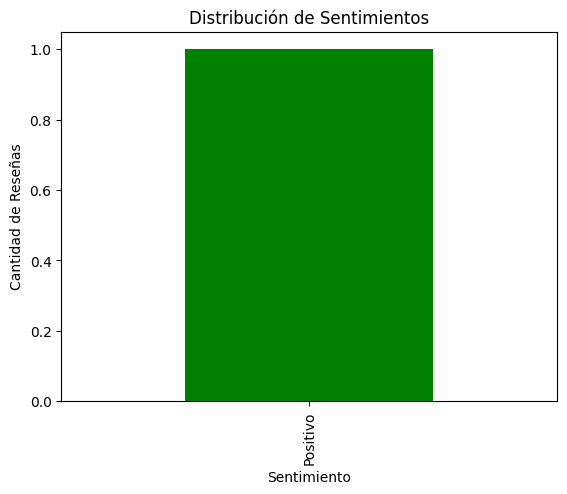

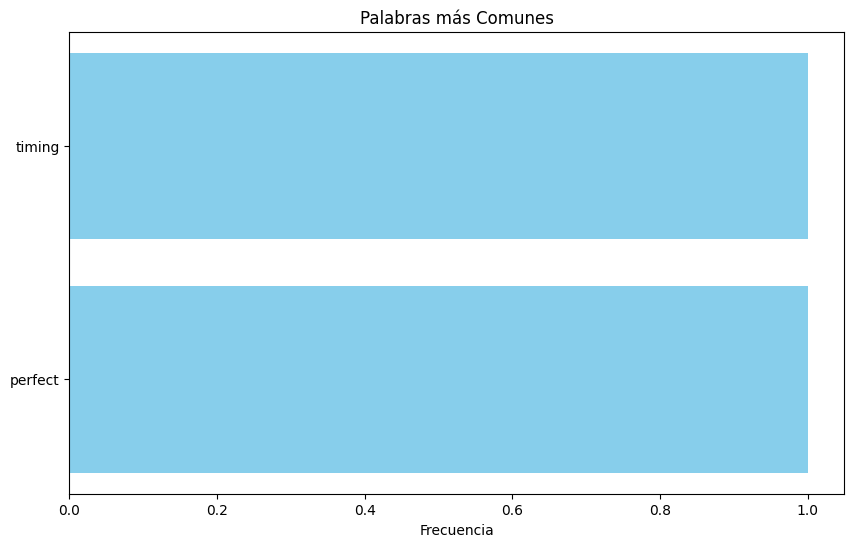

In [27]:
import matplotlib.pyplot as plt

# Gráfico de Sentimientos
sentimiento_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# Gráfico de Palabras Clave
top_words = dict(word_counts.most_common(10))
plt.figure(figsize=(10, 6))
plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
plt.title('Palabras más Comunes')
plt.xlabel('Frecuencia')
plt.show()


In [28]:
import re
from textblob import TextBlob

# Identificar aspectos específicos
aspectos = ['sabor', 'precio', 'calidad', 'envío', 'empaque']

def analizar_aspectos(texto):
    opiniones_aspectos = {}
    for aspecto in aspectos:
        if re.search(aspecto, texto.lower()):
            sentimiento = TextBlob(texto).sentiment.polarity
            opiniones_aspectos[aspecto] = 'Positivo' if sentimiento > 0 else 'Negativo' if sentimiento < 0 else 'Neutro'
    return opiniones_aspectos

# Aplicar el análisis a cada reseña
df['Aspectos Analizados'] = df['Review'].apply(analizar_aspectos)

# Mostrar algunos ejemplos
print(df[['Review', 'Aspectos Analizados']].head())


              Review Aspectos Analizados
0  Perfect timing :)                  {}


## Analisis de Jack Daniels

In [32]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  # Cambia esta ruta según la ubicación de tu Firefox

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Jack-Daniels-Tennessee-Whisky-Proof/dp/B007C62D6Y/"
driver.get(url)

# Esperar a que el botón "See more reviews" esté disponible y hacer clic
wait = WebDriverWait(driver, 10)
try:
    see_more_reviews_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")))
    see_more_reviews_button.click()
except Exception as e:
    print(f"No se encontró el botón 'See more reviews'. Error: {e}. Continuando con la página actual...")

# Lista para almacenar las reseñas
reviews = []

# Bucle para extraer reseñas de varias páginas
while True:
    # Esperar a que las reseñas se carguen
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'review-text-content')))

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    # Intentar encontrar y hacer clic en el botón de "Siguiente página"
    try:
        next_button = driver.find_element(By.CLASS_NAME, 'a-last')
        # Verificar si el botón "Siguiente" está habilitado
        if "a-disabled" in next_button.get_attribute("class"):
            print("No hay más páginas disponibles.")
            break
        next_button.click()
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue
    except Exception as e:
        print(f"No se pudo encontrar el botón 'Siguiente página' o hubo un problema: {e}")
        break  # Salir del bucle si no se encuentra el botón "Siguiente página"

# Cerrar el navegador
driver.quit()

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('jack_daniels_reviews.csv', index=False)

print("Reseñas extraídas y guardadas en 'jack_daniels_reviews.csv'")


No hay más páginas disponibles.
Reseñas extraídas y guardadas en 'jack_daniels_reviews.csv'


In [33]:
import pandas as pd

# Especificar la ruta al archivo CSV
file_path = 'jack_daniels_reviews.csv'  # Cambia la ruta si el archivo está en otra ubicación

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Obtener la cantidad de filas y columnas
num_filas, num_columnas = df.shape

# Mostrar los resultados
print(f"Cantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")


Cantidad de filas: 100
Cantidad de columnas: 1


## Analisis de sentimientos

In [36]:
import pandas as pd
from textblob import TextBlob

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'  # Asegúrate de que el archivo esté en el mismo directorio que tu script
df = pd.read_csv(file_path)

# Asegurarse de que todas las reseñas sean cadenas de texto (y no NaN)
df['Review'] = df['Review'].fillna('')

# Función para obtener el sentimiento de una reseña
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimiento a cada reseña
df['Sentimiento'] = df['Review'].apply(obtener_sentimiento)

# Contar la cantidad de reseñas por tipo de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()

# Mostrar la distribución de sentimientos
print("Distribución de Sentimientos:")
print(sentimiento_counts)

# Guardar los resultados en un nuevo archivo CSV
df.to_csv('jack_daniels_reviews_sentimientos.csv', index=False)
print("Análisis de sentimientos guardado en 'jack_daniels_reviews_sentimientos.csv'")



Distribución de Sentimientos:
Sentimiento
Neutro      76
Positivo    23
Negativo     1
Name: count, dtype: int64
Análisis de sentimientos guardado en 'jack_daniels_reviews_sentimientos.csv'


## Palabras claves

In [37]:
import pandas as pd
import nltk
from collections import Counter
import re

# Descargar las stopwords si aún no lo has hecho
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Combinar todas las reseñas en un solo texto
all_reviews = ' '.join(df['Review'].fillna(''))

# Convertir a minúsculas y eliminar signos de puntuación
all_reviews = all_reviews.lower()
all_reviews = re.sub(r'\W+', ' ', all_reviews)

# Dividir en palabras
words = all_reviews.split()

# Eliminar palabras comunes (stopwords)
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))
filtered_words = [word for word in words if word not in stop_words]

# Contar las palabras más comunes
word_counts = Counter(filtered_words)

# Mostrar las 10 palabras más comunes (las palabras clave)
print("Las 10 palabras más comunes:")
print(word_counts.most_common(10))


Las 10 palabras más comunes:
[('bom', 57), ('muito', 50), ('um', 29), ('é', 28), ('produto', 23), ('whisky', 18), ('chegou', 17), ('jack', 15), ('gosto', 14), ('com', 14)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Asegurarse de que todas las reseñas sean cadenas de texto (y no NaN)
df['Review'] = df['Review'].fillna('')

# Vectorizar las reseñas para comparar similitudes
tfidf = TfidfVectorizer().fit_transform(df['Review'])

# Calcular la matriz de similitud coseno
similarities = cosine_similarity(tfidf, tfidf)

# Configurar un umbral para considerar reseñas como "repetidas"
umbral_similitud = 0.8

# Buscar pares de reseñas similares
pairs = np.argwhere((similarities > umbral_similitud) & (similarities < 1.0))

print("Pares de reseñas similares:")
for i, j in pairs:
    print(f"\nReseña {i + 1}: {df['Review'].iloc[i]}")
    print(f"Reseña {j + 1}: {df['Review'].iloc[j]}")


Pares de reseñas similares:

Reseña 18: Cámara morros ya se la saben!! El pomo Jack Daniel's te va a poner bien persa!! Pero siendo original no temas a qué te vayas a desconectar y menos quedarte ciego. Pues comprenlo perros y pónganse hasta tras!! Ah!! No le pegues a la banda si!!!
Reseña 18: Cámara morros ya se la saben!! El pomo Jack Daniel's te va a poner bien persa!! Pero siendo original no temas a qué te vayas a desconectar y menos quedarte ciego. Pues comprenlo perros y pónganse hasta tras!! Ah!! No le pegues a la banda si!!!

Reseña 51: Saboroso e muito agradável! Pena que está cada vez mais caro!
Reseña 51: Saboroso e muito agradável! Pena que está cada vez mais caro!

Reseña 62: E aquela história tem gente que ama e tem gente que odeia ... tem gente que sente o doce do caramelo entem gente que sente gosto de acetona kkkkk , eu gosto... acho que vale a pena vc comprar uma vez pelo menos pra experimentar e entender pq tem tantos fãs e tantos haters!
Reseña 62: E aquela história

## Analisis de palabras por categorias

In [39]:
import pandas as pd
import re

# Definir categorías y palabras clave
categorias = {
    'Sabor': ['sabor', 'taste', 'flavor', 'gosto'],
    'Precio': ['precio', 'price', 'preço'],
    'Entrega': ['entrega', 'delivery', 'envío'],
    'Calidad': ['calidad', 'quality', 'qualidade']
}

# Función para categorizar reseñas
def categorizar_resena(review):
    for categoria, palabras in categorias.items():
        if any(re.search(fr'\b{palabra}\b', review.lower()) for palabra in palabras):
            return categoria
    return 'Otros'

# Aplicar la categorización a las reseñas
df['Categoría'] = df['Review'].apply(categorizar_resena)

# Resumen de reseñas por categoría
resumen_por_categoria = df['Categoría'].value_counts()

print("Distribución de reseñas por categoría:")
print(resumen_por_categoria)

# Guardar los resultados en un nuevo archivo CSV
df.to_csv('jack_daniels_reviews_por_categoria.csv', index=False)
print("Análisis de reseñas por categoría guardado en 'jack_daniels_reviews_por_categoria.csv'")


Distribución de reseñas por categoría:
Categoría
Otros      74
Sabor      10
Precio      8
Entrega     6
Calidad     2
Name: count, dtype: int64
Análisis de reseñas por categoría guardado en 'jack_daniels_reviews_por_categoria.csv'


## Vamos a ver que opiniones entran dentro de otros 71

In [41]:
import pandas as pd

# Cargar el archivo CSV con las categorías asignadas
file_path = 'jack_daniels_reviews_por_categoria.csv'
df = pd.read_csv(file_path)

# Filtrar las reseñas en la categoría "Otros"
otros_df = df[df['Categoría'] == 'Otros']

# Mostrar las reseñas categorizadas como "Otros"
print("Reseñas en la categoría 'Otros':")
print(otros_df['Review'])

# Guardar estas reseñas en un nuevo archivo CSV para su análisis posterior
otros_df.to_csv('jack_daniels_reviews_otros.csv', index=False)
print("Reseñas categorizadas como 'Otros' guardadas en 'jack_daniels_reviews_otros.csv'")


Reseñas en la categoría 'Otros':
0     Great product, tastes great, nice and smooth, ...
3                Great sour mash. Good on a budget too.
4     It is very good, but I think I like the honey ...
5                        It’s jack 🤷🏼‍♀️ What can I say
7     What's there to say except I got my JD deliver...
                            ...                        
95    Super recomendo o pedido chegou em 2 dias\nOri...
96                               Original, pode confiar
97                                                  Bom
98            Chegou bem embalado, sem nenhum problema.
99    Custo-benefício não é muito bom, mas vale a pe...
Name: Review, Length: 71, dtype: object
Reseñas categorizadas como 'Otros' guardadas en 'jack_daniels_reviews_otros.csv'


## Ampliamos categorias

In [43]:
import pandas as pd
import re

# Definir categorías y palabras clave
categorias = {
    'Sabor': ['sabor', 'taste', 'flavor', 'gosto'],
    'Precio': ['precio', 'price', 'preço'],
    'Entrega': ['entrega', 'delivery', 'envío'],
    'Calidad': ['calidad', 'quality', 'qualidade', 'smooth', 'good'],
    'Embalaje': ['embalaje', 'packaging', 'pack', 'bolsa', 'caja', 'box'],
    'Servicio al Cliente': ['servicio al cliente', 'customer service', 'serviço ao cliente'],
    'Aroma': ['aroma', 'smell', 'fragancia', 'fragrance'],
    'Experiencia General': ['experiencia', 'overall', 'general', 'experience', 'jack', 'JD', 'classic'],
    'Envase': ['botella', 'tapa', 'envase', 'lacre', 'bottle', 'cap'],
    'Marca': ['marca', 'brand', 'jack', 'JD']
}

# Función para categorizar reseñas
def categorizar_resena(review):
    # Asegurarse de que la reseña es una cadena de texto
    if not isinstance(review, str):
        return 'Otros'
    
    for categoria, palabras in categorias.items():
        if any(re.search(fr'\b{palabra}\b', review.lower()) for palabra in palabras):
            return categoria
    return 'Otros'

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Asegurarse de que todas las reseñas sean cadenas de texto (y no NaN)
df['Review'] = df['Review'].fillna('')

# Aplicar la categorización a las reseñas
df['Categoría'] = df['Review'].apply(categorizar_resena)

# Resumen de reseñas por categoría
resumen_por_categoria = df['Categoría'].value_counts()

print("Nueva distribución de reseñas por categoría:")
print(resumen_por_categoria)

# Guardar los resultados en un nuevo archivo CSV
df.to_csv('jack_daniels_reviews_por_categoria.csv', index=False)
print("Análisis de reseñas por categoría guardado en 'jack_daniels_reviews_por_categoria.csv'")


Nueva distribución de reseñas por categoría:
Categoría
Otros                  58
Sabor                  10
Experiencia General     8
Precio                  8
Entrega                 6
Calidad                 5
Envase                  3
Embalaje                1
Aroma                   1
Name: count, dtype: int64
Análisis de reseñas por categoría guardado en 'jack_daniels_reviews_por_categoria.csv'
